### Jonathan Bunch

24 October 2021

Bellevue University

DSC550-T301

---

# Titanic Case Study Part 3

In [16]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split

In [17]:
# Load the data set. I saved the finished data set from last week's exercise using pandas' to_csv() method.
t7 = pd.read_csv("titanic-week-7.csv", index_col='index')

First, I need to fix a mistake I made last week. I did not create appropriate dummy variables for the "Pclass"
feature. Thank you for the feedback!

In [18]:
# Create the dummy variables as a new dataframe.
pclassdf = pd.get_dummies(t7.Pclass, prefix='Pclass')
# Join them to the existing dataframe.
t8 = t7.join(pclassdf)
# Drop the original.
t8 = t8.drop(columns='Pclass')
# Check the results.
t8.head()

,Survived,Age,SibSp,Parch,log_fare,sex_males_one,embarked_dummy,Pclass_1,Pclass_2,Pclass_3
index,,,,,,,,,,
0,0,22.0,1,0,2.110213,1,0,0,0,1
1,1,38.0,1,0,4.280593,0,1,1,0,0
2,1,26.0,0,0,2.188856,0,0,0,0,1
3,1,35.0,1,0,3.990834,0,0,1,0,0
4,0,35.0,0,0,2.202765,1,0,0,0,1


## 14.	Training - Split your data into two sets:  Training and Testing.

In [19]:
# For convenience, I will assign the target and predictive features to variables.
t8_target = t8.Survived.values
t8_predictive = t8.iloc[:, 1:].values
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(t8_predictive, t8_target, test_size=0.3, random_state=11)

In [20]:
# Split the data into training and testing sets. I sliced the desired features from my dataframe using the column
# indices and names.
# X_train, X_val, y_train, y_val = train_test_split(t8.iloc[:, 1:], t8.loc[:, 'Survived'],
# test_size=0.3, random_state=11)

In [21]:
# Print the number of samples in each set.
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])
# Print the counts for survived and not-survived.
print('No. of survived and not-survived in the training set:')
print('Survived: ', sum(y_train == 1), '  Not Survived: ', sum(y_train == 0))
print('No. of survived and not-survived in the validation set:')
print('Survived: ', sum(y_test == 1), '   Not Survived: ', sum(y_test == 0))

No. of samples in training set:  623
No. of samples in validation set: 268
No. of survived and not-survived in the training set:
Survived:  250   Not Survived:  373
No. of survived and not-survived in the validation set:
Survived:  92    Not Survived:  176


## 15.	 Evaluation – Remember, we are trying to predict if a passenger has survived or not so this is a classification problem.  There are many algorithms that could be used but we’re going to use logistic regression.

In [22]:
# Create the regression model.
model = LogisticRegression(max_iter=500)
# Fit the model to the training data.
model.fit(X_train, y_train)
# View the mean accuracy score of our model.
score = model.score(X_test, y_test)
print("The mean accuracy score of this model is: {}".format(score))
# Use the model to predict values.
predicted_vals = model.predict(X_test)
# Predict confidence scores (I will use this for the ROC curve step).
y_pred = model.decision_function(X_test)

The mean accuracy score of this model is: 0.8432835820895522


### Confusion Matrix  (you should get 84% - pretty good)

In [23]:
# Create a confusion matrix.
cm = confusion_matrix(y_test, predicted_vals, labels=model.classes_)

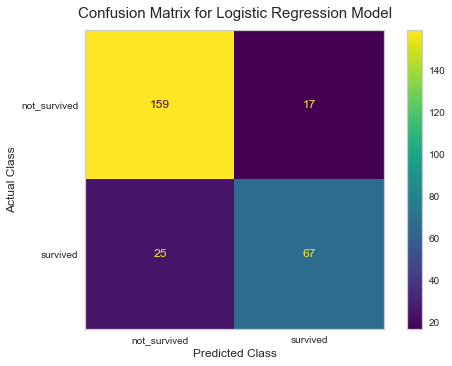

In [24]:
# Create a visualization of the confusion matrix.
classes = ['not_survived', 'survived']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for Logistic Regression Model', fontsize=15, pad=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.show()

### Precision, Recall & F1 score (all 3 were very good)

              precision    recall  f1-score   support

not_survived       0.86      0.90      0.88       176
    survived       0.80      0.73      0.76        92

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



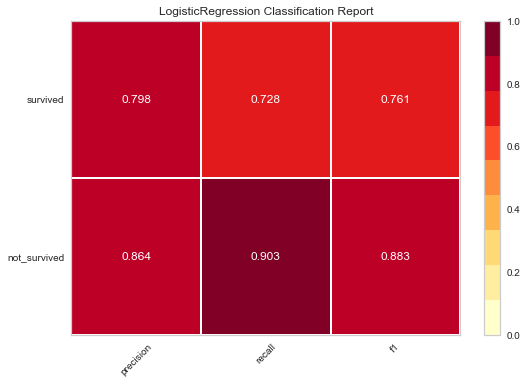

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [25]:
# We can get these values using the classification_report method from sklearn.
report = classification_report(y_test, predicted_vals, target_names=classes)
print(report)

# Alternatively, we could use the ClassificationReport method from yellowbrick to visualize the results.
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### ROC curve (the dotted line is the randomly guessed so anything above that is good metric)

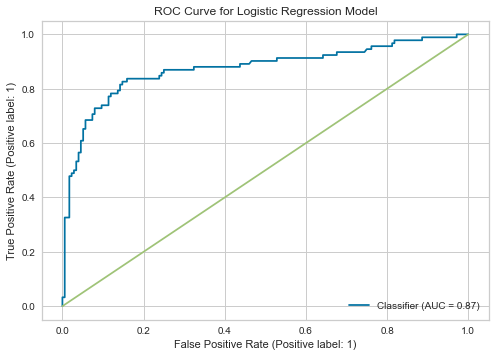

In [26]:
# One way to get a basic visualization of the ROC curve is to use RocCurveDisplay from sklearn.
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve for Logistic Regression Model")
# For comparison, add a line representing the ROC curve for random selection.
plt.plot([0, 1])
plt.show()

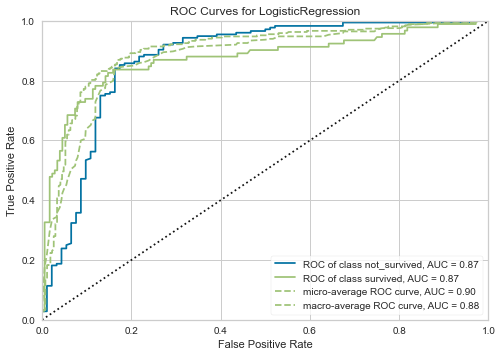

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
# The ROCAUC visualizer from yellowbrick provides a more thorough visualization.
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()